# Report on User Reviews Analysis for ChatGPT Android App

**Introduction:**
This report presents an analysis of user reviews for the ChatGPT Android App. The dataset comprises daily-updated user reviews, including information such as review ID, user name, review content, score, thumbs up count, review creation version, timestamp, and app version. The aim of this analysis is to extract insights into user sentiment, identify patterns, and understand user satisfaction levels to inform potential app improvements and enhancements.

**Key Findings:**
The analysis revealed several key findings. Firstly, the distribution of scores indicates that the majority of users provide high ratings, suggesting overall satisfaction with the app. However, there are also instances of lower ratings, indicating areas for potential improvement. Secondly, an examination of average scores by app version highlights variations in user satisfaction across different versions. Understanding these variations can help prioritize bug fixes and feature enhancements. Thirdly, a correlation analysis between various factors such as score, thumbs up count, and review length provides insights into factors influencing user satisfaction and engagement. Moreover, a time series analysis of scores over time can reveal trends and fluctuations in user sentiment.

**Recommendations:**
Based on the findings, several recommendations can be made to improve the ChatGPT Android App. Firstly, addressing issues identified in lower-rated reviews can help improve overall user satisfaction. This may involve fixing bugs, enhancing app performance, and refining user experience. Secondly, prioritizing feature enhancements and updates based on user feedback and satisfaction levels can lead to more meaningful improvements. Additionally, maintaining a proactive approach to addressing user concerns and continuously monitoring user feedback can contribute to ongoing app refinement and optimization.

**Conclusion:**
In conclusion, the analysis of user reviews for the ChatGPT Android App provides valuable insights into user sentiment, satisfaction levels, and areas for improvement. By leveraging these insights, developers can make informed decisions to enhance the app's performance, features, and overall user experience. Continuous monitoring of user feedback and adaptation to evolving user needs are crucial for maintaining user satisfaction and ensuring the long-term success of the app in a competitive market landscape.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [23]:
data = pd.read_csv("/kaggle/input/chatgpt-reviews-daily-updated/chatgpt_reviews.csv")

In [24]:
data.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,1ea528a6-6d5d-4c9a-b266-9df306f20ed7,abdulwaheed aminat,"amazing app,easy to navigate.",5,0,1.2024.101,2024-05-12 23:38:52,1.2024.101
1,9df43688-8a80-419e-b36d-61c95fd17d2a,Benedette Morison,"The app is recommendable and reliable, especia...",5,0,1.2024.115,2024-05-12 23:35:02,1.2024.115
2,80b9806a-c5eb-44da-9f0d-6cd864c1f4cf,Android Trigger,Superb ai app,5,0,1.2024.122,2024-05-12 23:27:05,1.2024.122
3,ec5ea9e5-86bc-4de0-b170-f2871833ce74,Brian Peters,Best thing that ever happened to me.,5,0,1.2024.122,2024-05-12 23:17:46,1.2024.122
4,1e396118-3934-4ce6-8390-b2d56771e343,Gautam kumar Patel,this is very good app,5,0,1.2024.108,2024-05-12 23:12:56,1.2024.108


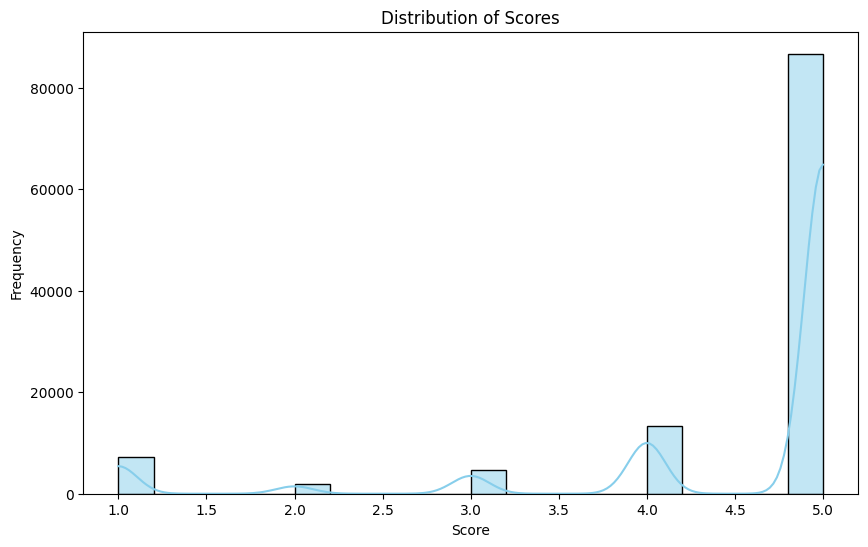

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(data['score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

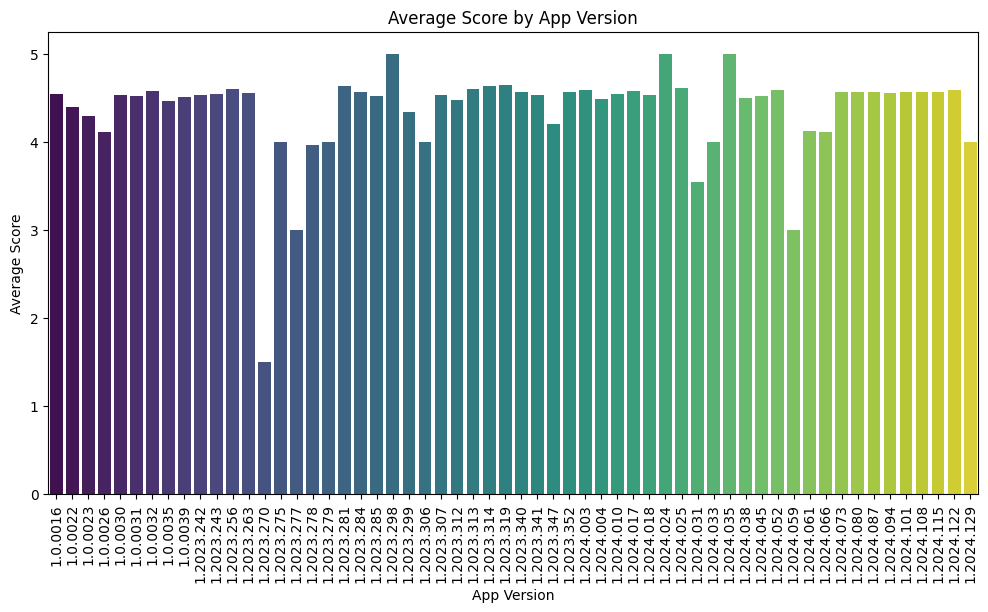

In [34]:
avg_score_by_version = data.groupby('appVersion')['score'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='appVersion', y='score', data=avg_score_by_version, palette='viridis')
plt.title('Average Score by App Version')
plt.xlabel('App Version')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.show()

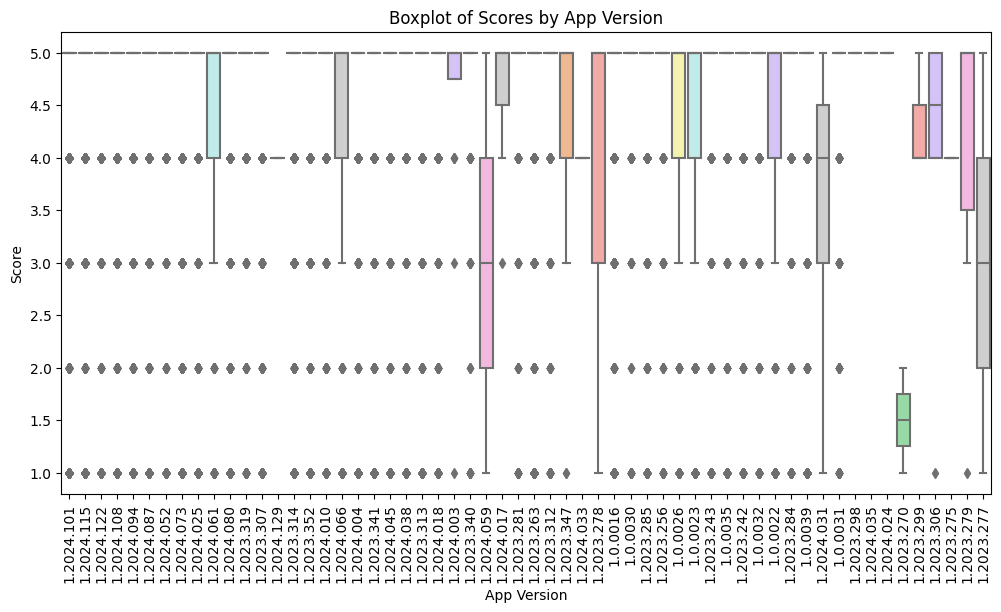

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='appVersion', y='score', data=data, palette='pastel')
plt.title('Boxplot of Scores by App Version')
plt.xlabel('App Version')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.show()

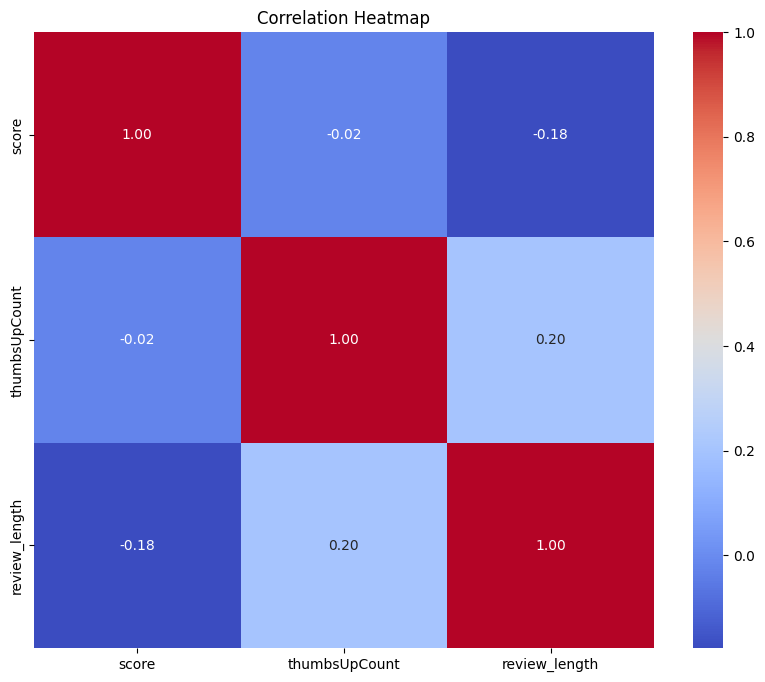

In [41]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

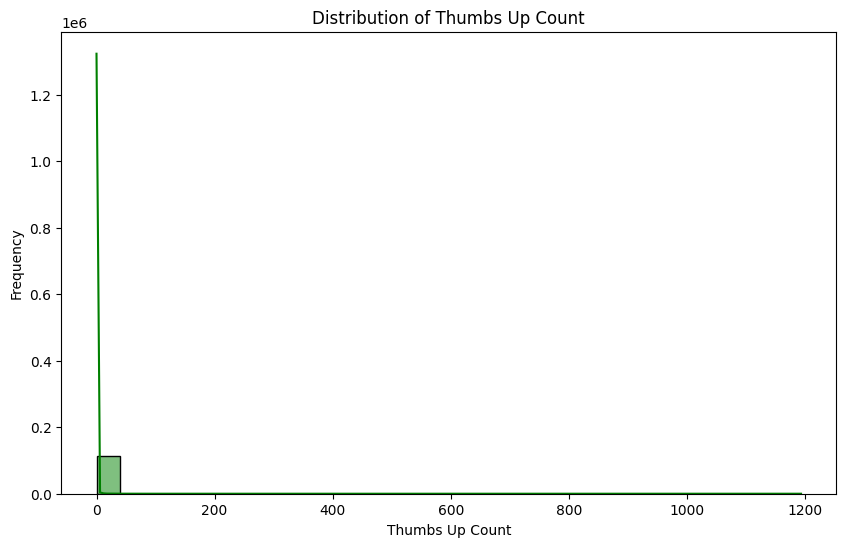

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data['thumbsUpCount'], bins=30, kde=True, color='green')
plt.title('Distribution of Thumbs Up Count')
plt.xlabel('Thumbs Up Count')
plt.ylabel('Frequency')
plt.show()

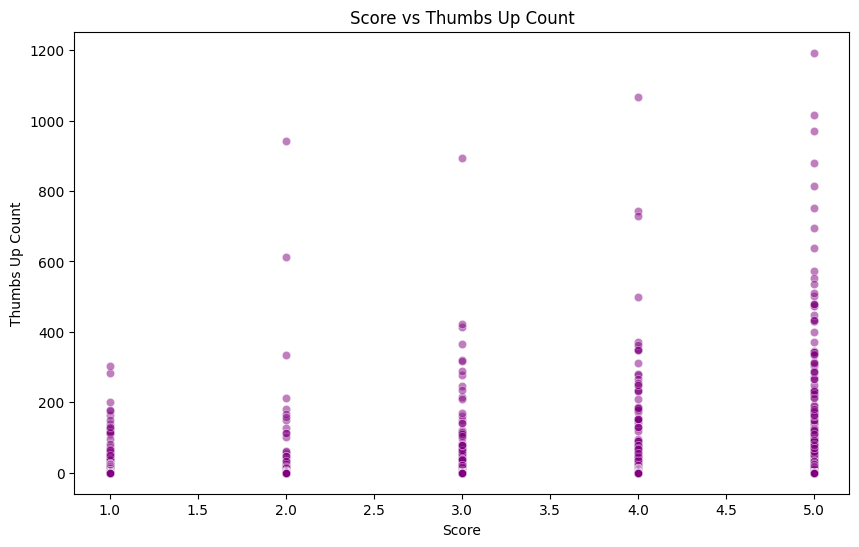

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='score', y='thumbsUpCount', data=data, color='purple', alpha=0.5)
plt.title('Score vs Thumbs Up Count')
plt.xlabel('Score')
plt.ylabel('Thumbs Up Count')
plt.show()

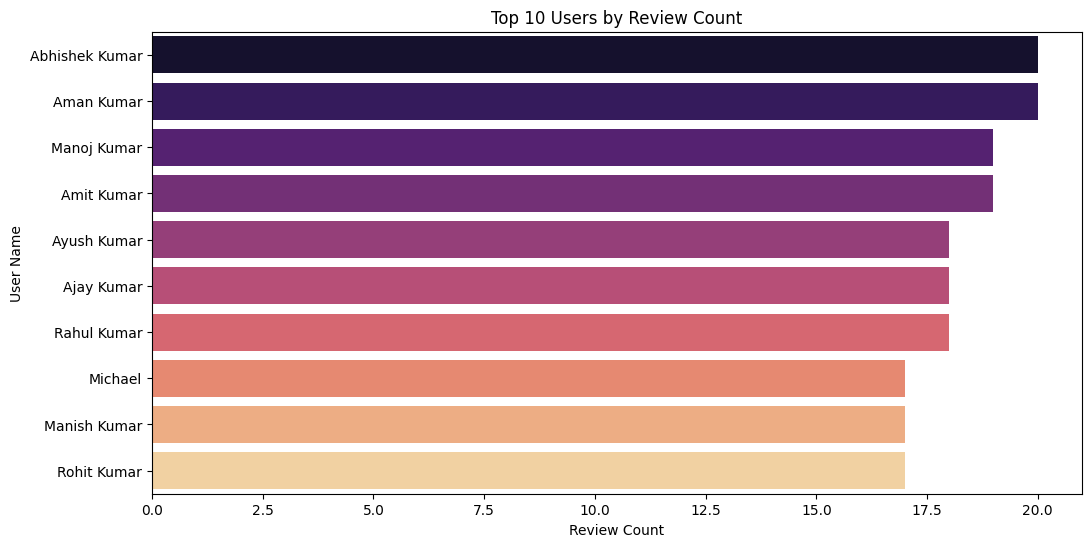

In [39]:
review_count_by_user = data['userName'].value_counts().reset_index()
review_count_by_user.columns = ['User Name', 'Review Count']
plt.figure(figsize=(12, 6))
sns.barplot(x='Review Count', y='User Name', data=review_count_by_user.head(10), palette='magma')
plt.title('Top 10 Users by Review Count')
plt.xlabel('Review Count')
plt.ylabel('User Name')
plt.show()

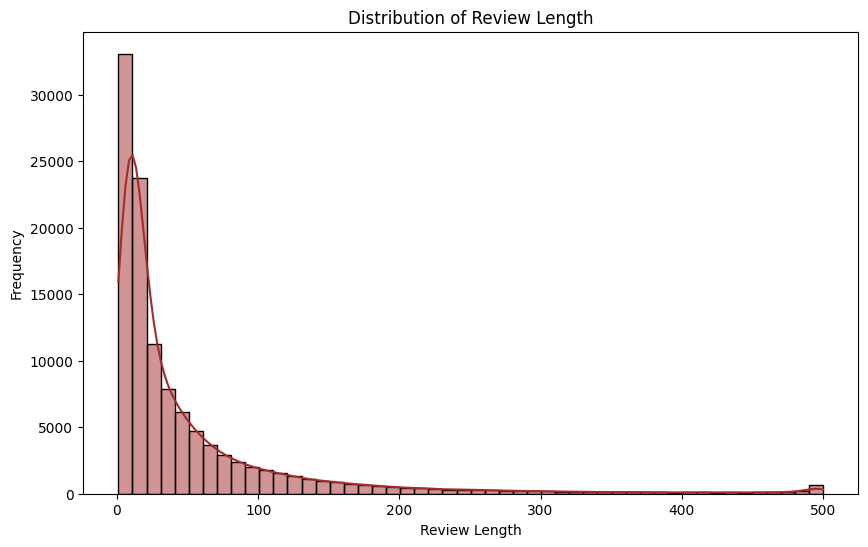

In [40]:
data['review_length'] = data['content'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 6))
sns.histplot(data['review_length'], bins=50, kde=True, color='brown')
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

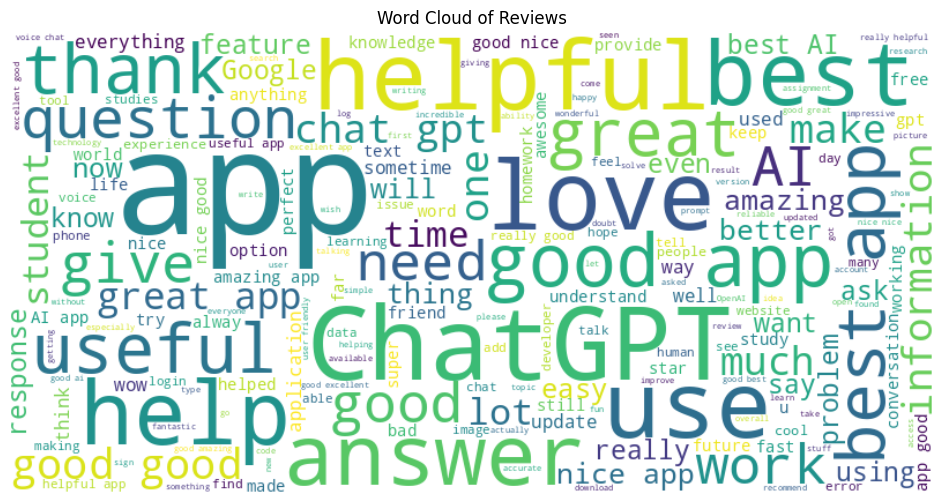

In [42]:
from wordcloud import WordCloud

reviews_text = ' '.join(data['content'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Reviews')
plt.axis('off')
plt.show()